In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('~/Downloads/sms-call-internet-mi-2013-11-01 2.txt', sep='\t',
                   header=None, names = ["Grid", "Time", "Country", "SMSin", "SMSout",
                                         "Callin", "Callout", "Internet"])

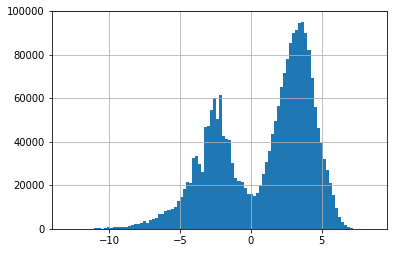

In [60]:
np.log(data["Internet"]).hist(bins=100)

In [74]:
metric = "Internet"
data = data[["Grid", "Country", metric]]
data = data[np.isfinite(data[metric])]
# data = data.head(1000000)

In [62]:
def moment(n):
    def moment_(x):
        return np.sum(np.power(x, n))
    moment_.__name__ = 'm%s' % n
    return moment_

cube = data.groupby(["Grid", "Country"]).agg({metric: [
    'min',
    'max',
    moment(0),
    moment(1),
    moment(2),
    moment(3),
    moment(4),
    moment(5),
    moment(6),
    moment(7),
    moment(8)
]}).reset_index(col_level=1)
cube.columns = cube.columns.get_level_values(1)
cube

,Grid,Country,min,max,m0,m1,m2,m3,m4,m5,m6,m7,m8
0,1,32,0.001787,0.001787,1.0,0.001787,3.194477e-06,5.709522e-09,1.020469e-11,1.823894e-14,3.259864e-17,5.826388e-20,1.041356e-22
1,1,33,0.026137,0.026137,5.0,0.130687,3.415825e-03,8.928086e-05,2.333572e-06,6.099355e-08,1.594214e-09,4.166866e-11,1.089111e-12
2,1,39,4.652791,19.834697,144.0,1506.565450,1.733675e+04,2.143301e+05,2.798359e+06,3.819016e+07,5.417785e+08,7.966347e+09,1.211974e+11
3,1,46,0.001787,0.026137,14.0,0.268523,6.844427e-03,1.785846e-04,4.667184e-06,1.219872e-07,3.188429e-09,8.333732e-11,2.178223e-12
4,1,49,0.027300,0.027300,3.0,0.081901,2.235946e-03,6.104237e-05,1.666485e-06,4.549582e-08,1.242057e-09,3.390873e-11,9.257241e-13
5,2,32,0.000922,0.000922,1.0,0.000922,8.492699e-07,7.826518e-10,7.212594e-13,6.646827e-16,6.125439e-19,5.644950e-22,5.202151e-25
6,2,33,0.027356,0.027356,5.0,0.136780,3.741749e-03,1.023592e-04,2.800137e-06,7.660049e-08,2.095482e-09,5.732396e-11,1.568153e-12
7,2,39,4.654205,19.886492,144.0,1512.362908,1.747867e+04,2.170730e+05,2.847356e+06,3.903768e+07,5.562676e+08,8.213929e+09,1.254549e+11
8,2,46,0.000922,0.027356,14.0,0.277246,7.486895e-03,2.047216e-04,5.600277e-06,1.532010e-07,4.190964e-09,1.146479e-10,3.136307e-12
9,2,49,0.027300,0.027300,3.0,0.081901,2.235946e-03,6.104237e-05,1.666485e-06,4.549582e-08,1.242057e-09,3.390873e-11,9.257241e-13


In [63]:
cube.to_csv('lib/src/test/resources/milan_moments_cubed.csv')

In [75]:
def outliers(t, name):
    def outliers_(x):
        return np.sum(x >= t)
    outliers_.__name__ = 'outliers%s' % name
    return outliers_

t1 = data[metric].quantile(0.99)
t5 = data[metric].quantile(0.95)
t10 = data[metric].quantile(0.90)
oracle = data.groupby(["Grid", "Country"]).agg({metric: [
    'count',
    outliers(t1, "1"),
    outliers(t5, "5"),
    outliers(t10, "10")
]}).reset_index(col_level=1)
oracle.columns = oracle.columns.get_level_values(1)
oracle

,Grid,Country,count,outliers1,outliers5,outliers10
0,1,32,1,0.0,0.0,0.0
1,1,33,5,0.0,0.0,0.0
2,1,39,144,0.0,0.0,0.0
3,1,46,14,0.0,0.0,0.0
4,1,49,3,0.0,0.0,0.0
5,2,32,1,0.0,0.0,0.0
6,2,33,5,0.0,0.0,0.0
7,2,39,144,0.0,0.0,0.0
8,2,46,14,0.0,0.0,0.0
9,2,49,3,0.0,0.0,0.0


In [76]:
oracle.to_csv('lib/src/test/resources/milan_oracle_cubed.csv')

In [77]:
print(cube["min"].min())
print(data[metric].min())

2.33149769953e-06
3.57891732062e-06
